# Домашнее задание 1

Выполнили студенты 25ИАД:
1) Данил Ерёменко
2) Кудасов Максим

Вариант -- 7

In [46]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.linear_model import BayesianRidge
from sklearn.covariance import MinCovDet
from sklearn.manifold import MDS
from scipy.stats import chi2
from scipy.spatial.distance import pdist, squareform
from itertools import combinations

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import copy

In [2]:
# Считываем датасет
name_of_cols = [
    "Age",
    "Number of dependents",
    "Income",
    "Duration of stay",
    "Vehicle appraisal",
    "Loan amount",
]

path_to_file = "Materials/25MAG_HW_1_v7.xls"
df = pd.read_excel(path_to_file, header=None, names=name_of_cols)
df

,Age,Number of dependents,Income,Duration of stay,Vehicle appraisal,Loan amount
0,42.0,4.0,43300.0,9.0,44000.0,437000.0
1,44.0,NaN,12100.0,13.0,12000.0,123000.0
2,47.0,3.0,28700.0,14.0,30000.0,293000.0
3,40.0,1.0,7500.0,11.0,7000.0,74000.0
4,39.0,1.0,9400.0,11.0,9000.0,93000.0
5,NaN,0.0,4900.0,7.0,4000.0,42000.0
6,50.0,3.0,14700.0,16.0,NaN,153000.0
7,56.0,4.0,25500.0,19.0,28000.0,268000.0
8,50.0,3.0,16800.0,16.0,18000.0,175000.0
9,39.0,2.0,NaN,9.0,29000.0,292000.0


## Быстрый анализ признаков и их распределений

Далее проведём быстрый визуальный анализ по каждому из признаков:
1) Найдём среднее, стандартное отклонение, медиану и квартили
2) Построим гистограммы для каждого из признаков
3) Сделаем вывод по уже имеющимся данным о возможном распределении в данных

In [3]:
# По каждому признаку найдём основные характеристики
# Как читать:
# mean -- среднее
# std -- стандартное отклонение
# 25%, 50%, 75% -- квартили
# 50% -- медиана

df.describe(percentiles=[.25, .50, .75])

,Age,Number of dependents,Income,Duration of stay,Vehicle appraisal,Loan amount
count,49.000000,49.0,49.000000,50.00000,49.000000,50.00000
mean,39.265306,2.0,19332.653061,9.84000,21081.632653,199960.00000
std,8.960040,1.0,9977.503607,4.87124,11638.364602,97963.54174
min,19.000000,0.0,1500.000000,0.00000,0.000000,4000.00000
25%,34.000000,1.0,12100.000000,6.00000,13000.000000,128500.00000
50%,40.000000,2.0,16800.000000,10.00000,19000.000000,193000.00000
75%,46.000000,3.0,28700.000000,14.00000,30000.000000,292750.00000
max,56.000000,4.0,43300.000000,19.00000,50000.000000,437000.00000


In [4]:
def draw_plots(table: pd.DataFrame):
    for feature in table.columns:
        values = table[feature].dropna()

        fig, axes = plt.subplots(1, 2, figsize=(10, 4), constrained_layout=True)
        ax_hist, ax_box = axes

        fig.suptitle(feature, fontsize=14)

        ax_hist.hist(values, bins=20)
        ax_box.boxplot(values, vert=False)

        plt.show()


def draw_corr_plots(table: pd.DataFrame):
    for (x, y) in combinations(table.columns, 2):
        if x == y:
            continue

        corrs = table[[x, y]].dropna()
        corr_coeff = corrs.corr(method="pearson").iloc[0, 1]
        
        if abs(corr_coeff) < 0.5:
            continue

        plt.scatter(corrs[x], corrs[y])
        plt.xlabel(x)
        plt.ylabel(y)

        plt.show()

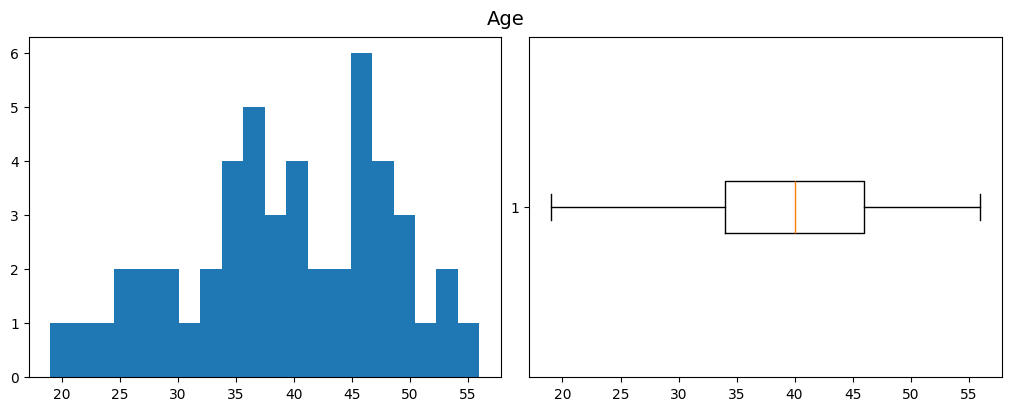

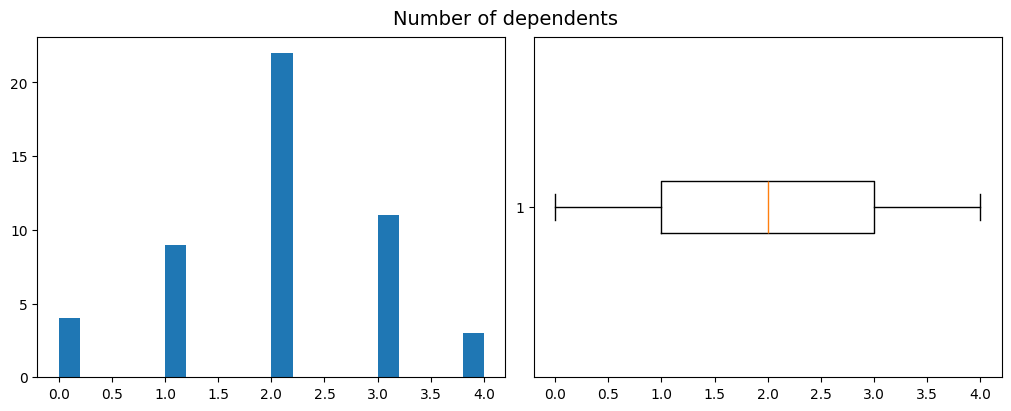

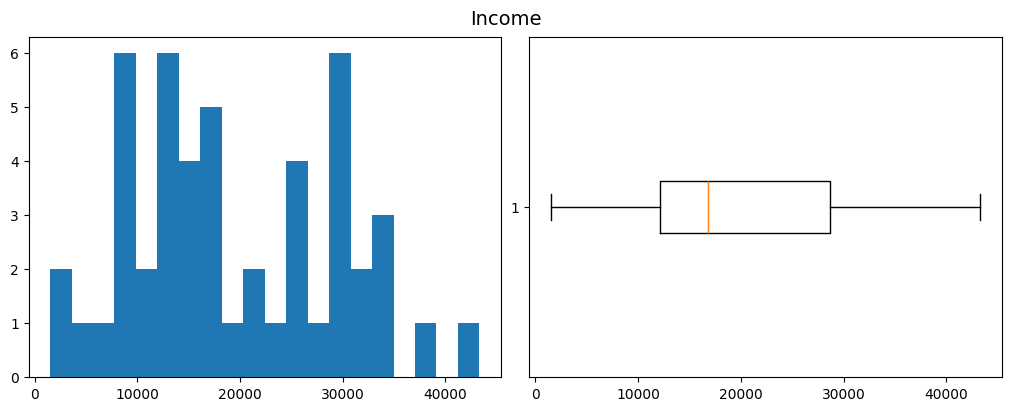

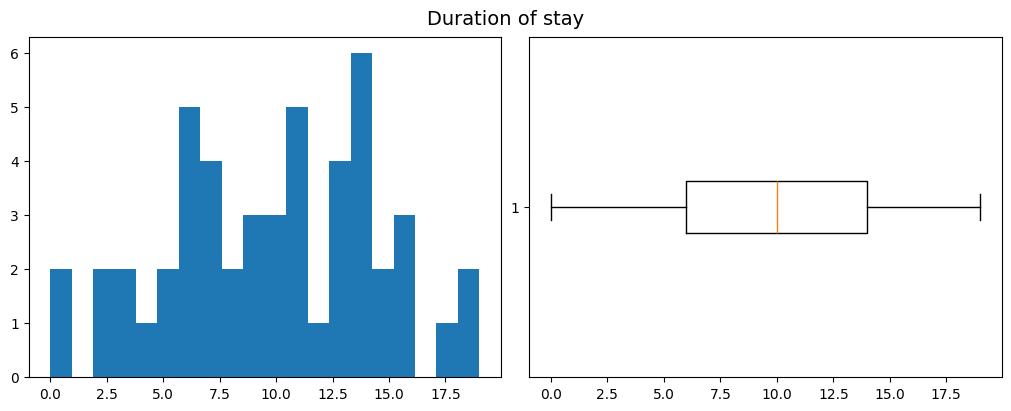

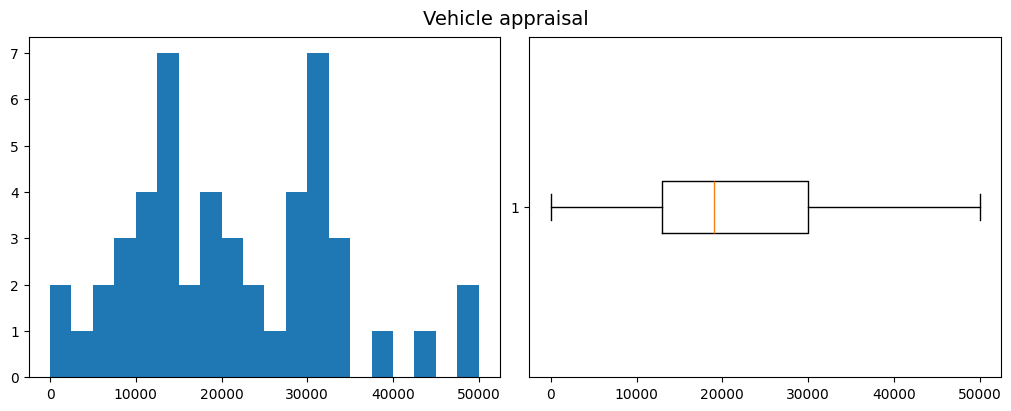

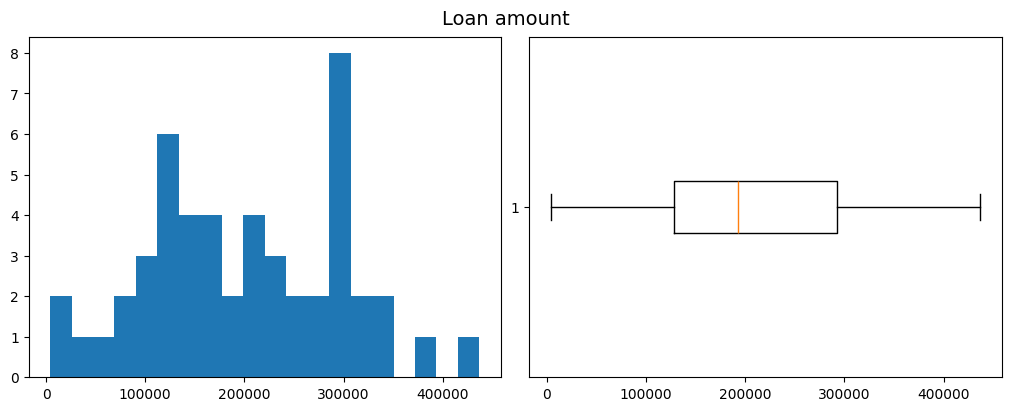

In [5]:
# Рисуем карты самих признаков
draw_plots(df)

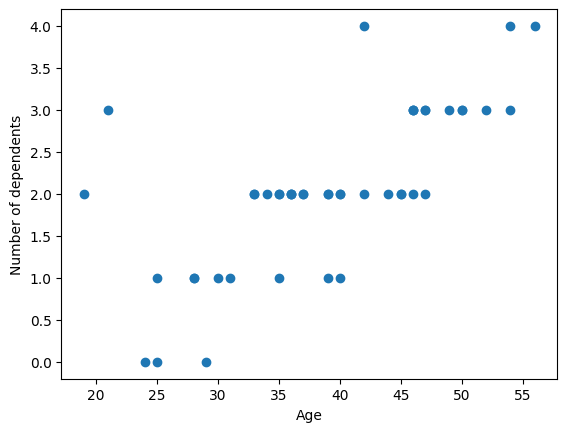

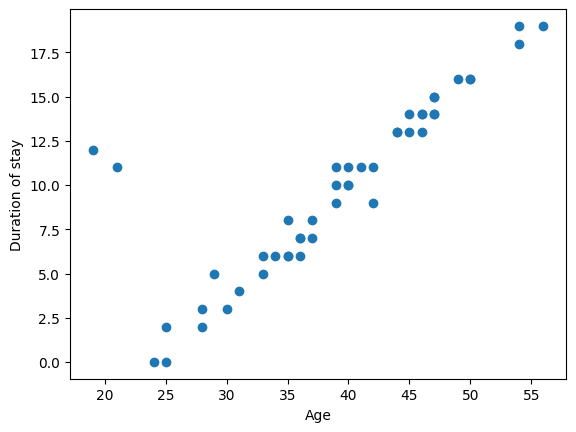

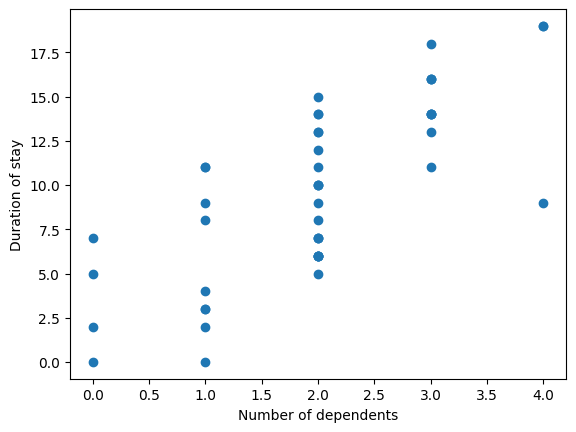

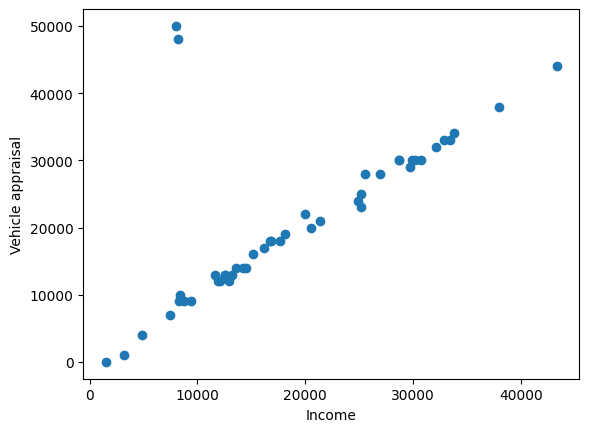

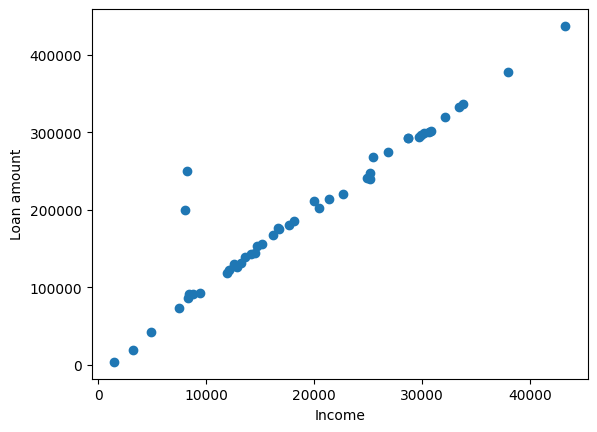

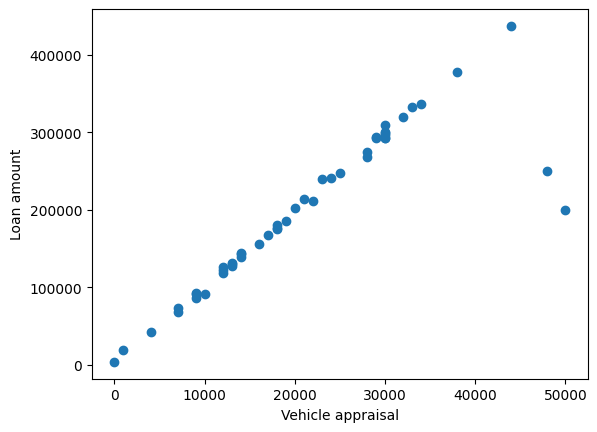

In [6]:
# А теперь их распределения между собой (для значимых величин)
draw_corr_plots(df)

Анализируя графики зависимостей, видно, что некоторые признаки между собой ОЧЕНЬ заметно коррелируют, при том практически линейно.
Среди них:
1) Зависимость числа иждивенцев от возраста. Есть три группы: 1 и меньше иждивенцев статистически имеют люди в возрасте от 25 до 40; 2 иждивенцами обладают люди в возрасте примерно от 32 до 47 (заметно выраженно); 3-4 иждивенцами обладают в преобладающем числе люди в возрасте от 45 до 55.
2) Зависимость возраста от срока пребывания в регионе. Практически линейная зависимость: чем старше человек, тем он дольше находится в регионе.
3) Число иждивенцев от срока проживания также линейно зависит, но сроки достаточно широкие, поэтому тут скорее проще сказать, что статистически число иждивенцев растёт со сроком пребывания, но очень неохотно.
4) Зависимость оценки автомобиля от его дохода тоже линейна: чем больше доход, тем дороже автомобиль.
5) Далее также видно: чем выше доход, тем выше и выбранный кредит, при том зависимость линейная
6) ...и, следовательно, линейная зависимость есть и у оценки автомобиля от размера кредита

Отсюда можно сделать вывод, что тут почти все факторы между собой очень сильно коррелируют, при том их можно отнести в две группы:
1) Группа "Возраст, время проживания, число иждивенцев"
2) Группа "Доход, кредит, автомобиль"

И между собой группы коррелируют незначительно (коэфф. корреляции ниже 0.5), поэтому можно уже предположить, что скрытых фактора будет не менее 2-х, но скорее всего либо 2, либо 3, т.к. корреляция на 0.3 между группами есть, но в ней достаточно мало полезных данных для анализа.

Также заметны выбросы поодаль от линии корреляции признаков.

## Предобработка данных

Есть несколько способов обработать пропуски в данных, среди них:
1) Вставка средним значением/медианой
2) Вставка среднего/медианы внутри группы (например, внутри признака смотреть на разные жёстко-разделённые группы по доходу)
2) Удаление строки с пропуском (не можем себе позволить здесь)
3) Регрессионна (обучаем регрессионную модель на имеющихся данных и заполняем с помощью обученной модели значения в признаках)

Из-за сильной корреляции в данных, брать константу будто бы не имеет смысла (будет смещение дисперсии), т.к. нет как жёсткого разграничения между группами (она, по сути, одна на каждый признак), а удаление клиента мы себе позволить не можем для дальнейшего анализа, поэтому выберем вариант с регрессией

Использовать будем готовую регрессионку из библиотеки scikit-learn.

Источники:
- https://loginom.ru/blog/missing

In [7]:
# Вот базовый класс заполнителя пропусков
imputer = IterativeImputer(BayesianRidge(), max_iter=20, random_state=0)
df_new = pd.DataFrame(imputer.fit_transform(df), columns=df.columns).map(lambda x: int(x))
df_new

,Age,Number of dependents,Income,Duration of stay,Vehicle appraisal,Loan amount
0,42,4,43300,9,44000,437000
1,44,2,12100,13,12000,123000
2,47,3,28700,14,30000,293000
3,40,1,7500,11,7000,74000
4,39,1,9400,11,9000,93000
5,32,0,4900,7,4000,42000
6,50,3,14700,16,16398,153000
7,56,4,25500,19,28000,268000
8,50,3,16800,16,18000,175000
9,39,2,29240,9,29000,292000


Далее обработка выбросов. Они тут есть, заметны на графиках.

Есть несколько вариантов обработать выбросы:
1) Обрезание через квантили (IQR) -- самый примитивный способ обрезки
2) Z-score, т.е. насколько далеко (в количестве стандартных отклонений) объект отдалён от центра
3) Махаланобис (то же, что и Z-score, но учитывает корреляции между признаками засчёт сжатия/растягивания пространства)
4) Изолированный лес (для многомерного случая)
5) DBSCAN (тоже многомерный)
6) ...и прочее

Предыдущий анализ показал, что у нас наблюдаются заметные корреляции по 2-м группам признаков, соответственно лучше взять способ Махаланобиса, т.к. он позволяет нам в нашей сильно коррелированной системе более эффективно вычищать признаки внутри скореллированных групп.

Так как среднее и дисперсия могут зависеть от выбросов (иногда значительно), лучше подстраховаться и рассматривать среднее и дисперсии на некотором наборе точек, и среди них искать такие, в которых достигается самая лучшая ковариация. Для этого попробуем использовать метод MinCovDet

Источники:
- https://loginom.ru/blog/outliers
- https://scikit-learn.org/stable/modules/outlier_detection.html
- https://scikit-learn.org/stable/auto_examples/applications/plot_outlier_detection_wine.html

In [8]:
def mahal_outliers_mask(table: pd.DataFrame, cols, alpha=0.99):
    X = table[cols]
    mcd = MinCovDet(random_state=42).fit(X)
    dist2 = mcd.mahalanobis(X) # тут уже получаем квадрат расстояния
    thr = chi2.ppf(alpha, len(cols)) # хи2 ограничение
    mask = pd.Series(True, index=df.index)
    mask.loc[X.index] = dist2 <= thr # False -- выброс
    return mask

In [9]:
df_new.shape

(52, 6)

In [10]:
df_cleaned = df_new[mahal_outliers_mask(df_new, df_new.columns)].copy()
df_cleaned.shape

(42, 6)

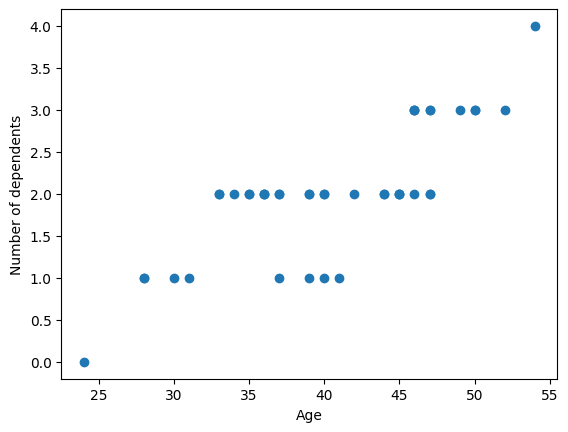

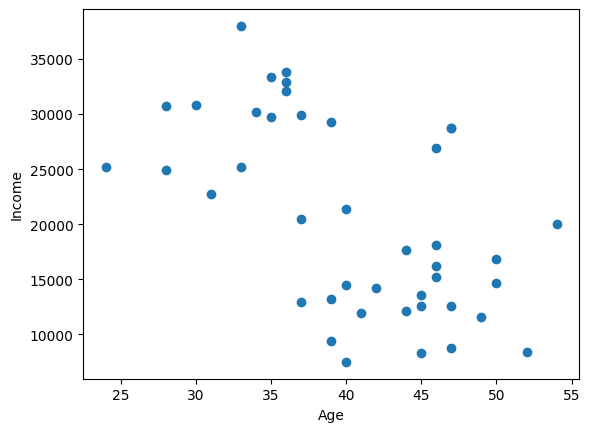

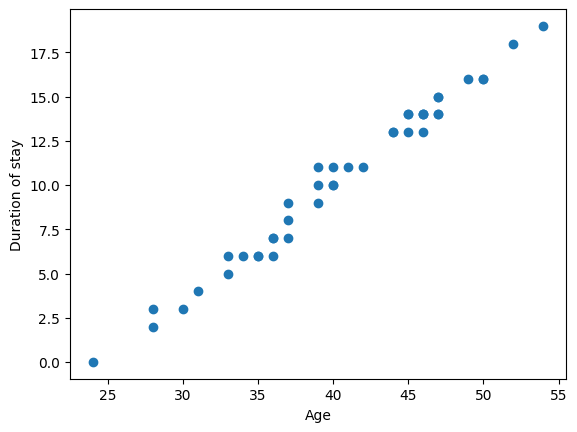

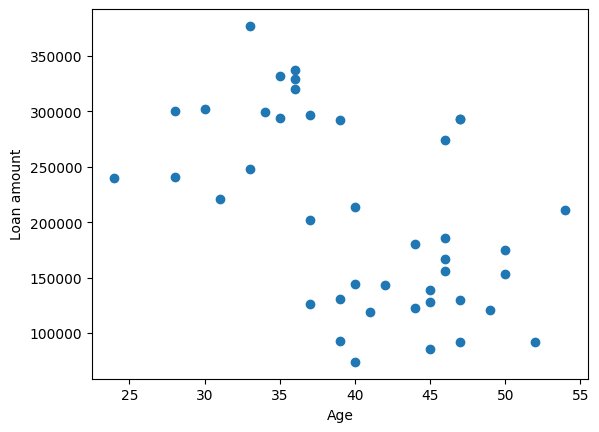

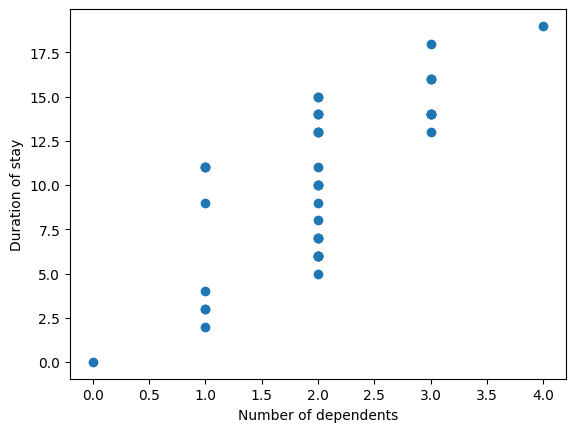

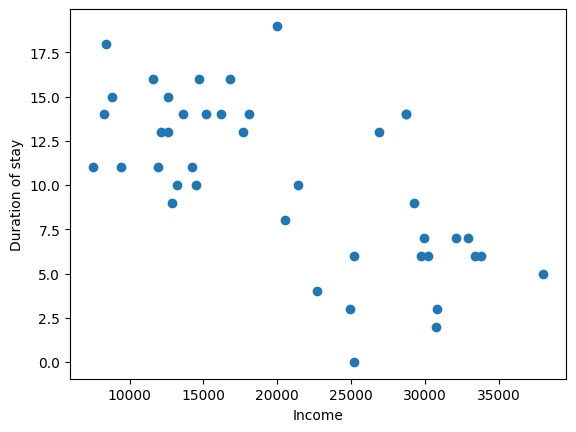

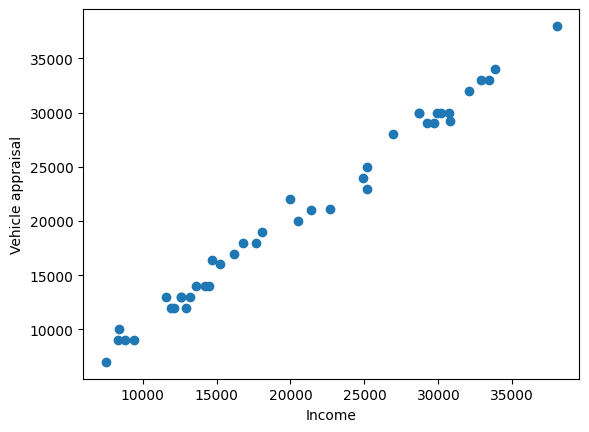

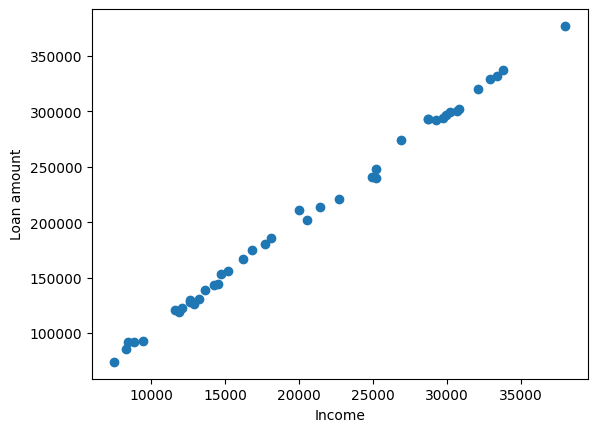

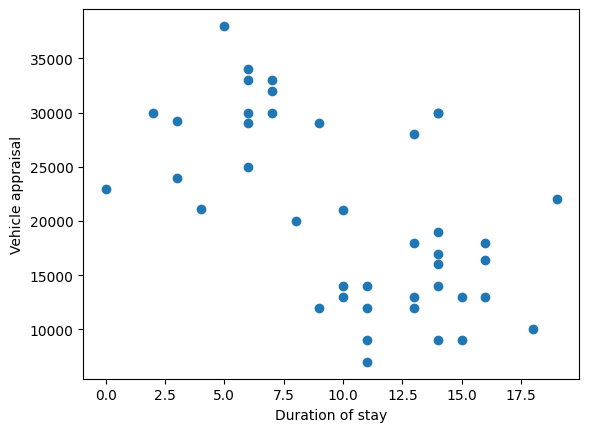

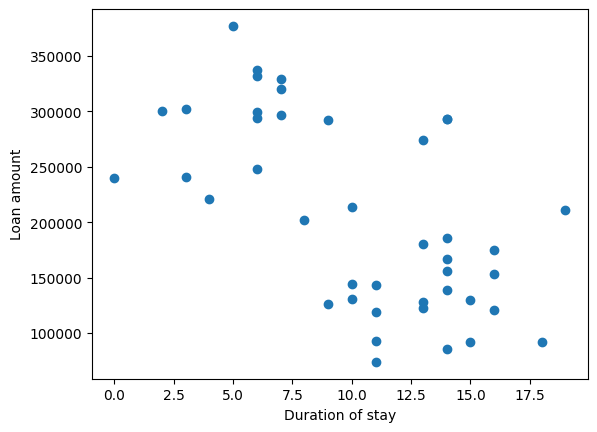

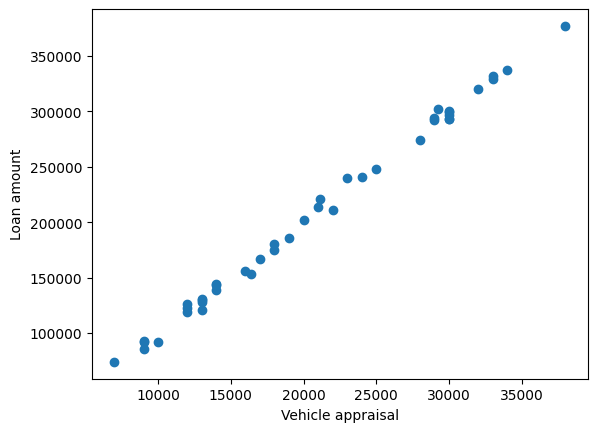

In [11]:
draw_corr_plots(df_cleaned)

Линейные корреляции между признаками в одной группе теперь более чистые, а распределение между принзаками из двух разных групп теперь имеет более видимую, хотя и всё ещё слабую зависимость. Далее требуется всё-таки проверить, действительно ли признаков 2 или предположение не верно. 

## Снижение размерности PCA

In [12]:
X_data = df_cleaned.to_numpy()

In [13]:
# Центрируем и нормализуем (через L2-норму)
X_centered = X_data - X_data.mean(axis=0)
X_cleaned = X_centered / np.linalg.norm(X_centered, axis=0)
X_cleaned

array([[ 0.07781889, -0.00476417, -0.15144843,  0.09033856, -0.15838323,
        -0.15197957],
       [ 0.14407012,  0.19533113,  0.14428831,  0.12391573,  0.16899263,
         0.15732702],
       [-0.01051607, -0.20485948, -0.23339958,  0.02318423, -0.24932097,
        -0.24113264],
       [-0.03259981, -0.20485948, -0.19955019,  0.02318423, -0.21294587,
        -0.20656308],
       [ 0.21032134,  0.19533113, -0.10512822,  0.19107006, -0.07839439,
        -0.09739605],
       [ 0.21032134,  0.19533113, -0.06771574,  0.19107006, -0.04925794,
        -0.05736814],
       [-0.03259981, -0.00476417,  0.15390866, -0.0439701 ,  0.15080508,
         0.15550757],
       [-0.12093477, -0.00476417,  0.16210378, -0.14470159,  0.15080508,
         0.15914647],
       [-0.36385591, -0.40495479,  0.08193418, -0.34616458,  0.0416798 ,
         0.06089614],
       [-0.09885103, -0.00476417,  0.20486089, -0.11112443,  0.20536773,
         0.20645218],
       [-0.09885103, -0.00476417,  0.21911327, -0.

In [14]:
# Проверяем корректность центрировки и нормировки
assert(np.allclose(X_cleaned, X_cleaned - X_cleaned.mean(axis=0))) # центр должен быть в нуле
assert(np.allclose(np.linalg.norm(X_cleaned, axis=0), np.array([1] * X_cleaned.shape[1]))) # l2 норма должна быть равна 1

## SVD разложение

Далее проведём разложение полученных данных для того, чтобы проанализировать данные на наличие скрытых признаков, на выявление главных признаков и зависимости между скрытыми признаками и изначальными

In [15]:
# Раскладываем
U, S, Vt = np.linalg.svd(X_cleaned, full_matrices=False)
S_r = np.diag(S)

In [16]:
print(f"U shape = {U.shape}")
print(f"S shape = {S.shape}")
print(f"Vt shape = {Vt.shape}")

U shape = (42, 6)
S shape = (6,)
Vt shape = (6, 6)


In [17]:
# Проверяем корректность разложения
assert(np.allclose(X_cleaned, U @ S_r @ Vt))

In [18]:
# Смотрим сингулярные числа
print(f"Сингулярные числа:\n{S}")
print(f"Квадраты сингулярных чисел:\n{S**2}")
print(f"Вклад факторов в вариацию данных (в %):")
contrib = S**2 / np.sum(S**2) * 100
print(contrib)

Сингулярные числа:
[2.02364797 1.3504323  0.27799071 0.05651367 0.02632668 0.00397075]
Квадраты сингулярных чисел:
[4.09515110e+00 1.82366741e+00 7.72788333e-02 3.19379474e-03
 6.93094005e-04 1.57668694e-05]
Вклад факторов в вариацию данных (в %):
[6.82525184e+01 3.03944568e+01 1.28798055e+00 5.32299123e-02
 1.15515668e-02 2.62781157e-04]


In [19]:
# Ищем первые k самых важных факторов
k = 2
sum_contrib = np.sum(contrib[:k])

X_k = U[:, :k] @ np.diag(S[:k]) @ Vt[:k, :] # считаем Zk, просто буквы другие
R = X_cleaned - X_k # Z - Zk
frobenius_error = np.sqrt(np.sum(R**2))
matrix_error = np.sqrt(np.linalg.svd(R, compute_uv=False)[0]**2)

print(f"Суммарный вклад первых {k} факторов: {sum_contrib:.2f}")
print(f"Ошибка аппроксимации (в норме Фробениуса): {frobenius_error:.2f}")
print(f"Ошибка аппроксимации (в матричной форме): {matrix_error:.2f}")

Суммарный вклад первых 2 факторов: 98.65
Ошибка аппроксимации (в норме Фробениуса): 0.28
Ошибка аппроксимации (в матричной форме): 0.28


## Анализ признаков

In [20]:
U2, S2, Vt2 = U[:, :k], S[:k], Vt[:k, :]
print(U2.shape)
print(S2.shape)
print(Vt2.shape)

(42, 2)
(2,)
(2, 6)


In [21]:
# Находим коэффициенты корреляции между скрытыми признаками и изначальными
feat_coeffs = Vt2.T * S2
feat_coeffs

array([[-0.84647607,  0.51598614],
       [-0.42363165,  0.88302901],
       [ 0.91489238,  0.40132485],
       [-0.89717418,  0.42359205],
       [ 0.87103508,  0.48825296],
       [ 0.89359606,  0.44587293]])

Тут мы наблюдаем следующее:
1) Существует 2 скрытых фактора, которые суммарно имеют вклад 98.65% в данные, при том абсолютная ошибка тоже достаточно мала.
2) Наше предположение о двух независимых группах не беспочвенно, тут действительно достаточно нмого признаков, которые очень сильно зависят от одного признака и слабее от другого, а конкретнее все признаки, кроме второго ("число иждивенцев"), сильно коррелируют с первым признаком (0.9), а со вторым слабее (0.4-0.5). Это объясняет сильную корреляцию между почти всеми признаками.
3) По этим признакам можно предположить, что, скорее всего, признаки называются "Платежеспособность" и "Семейность".

In [25]:
# PCA карта клиектов
clients_coords = pd.DataFrame(X_k @ Vt2.T, index=df_cleaned.index, columns=["Solvency", "Family indicator"])
clients_coords

,Solvency,Family indicator
1,-0.275358,-0.097496
2,0.051352,0.377565
3,-0.282308,-0.369821
4,-0.226845,-0.343634
6,-0.337856,0.176276
8,-0.290725,0.211145
9,0.237289,0.122244
10,0.324209,0.060532
12,0.472315,-0.452877
13,0.363791,0.127555


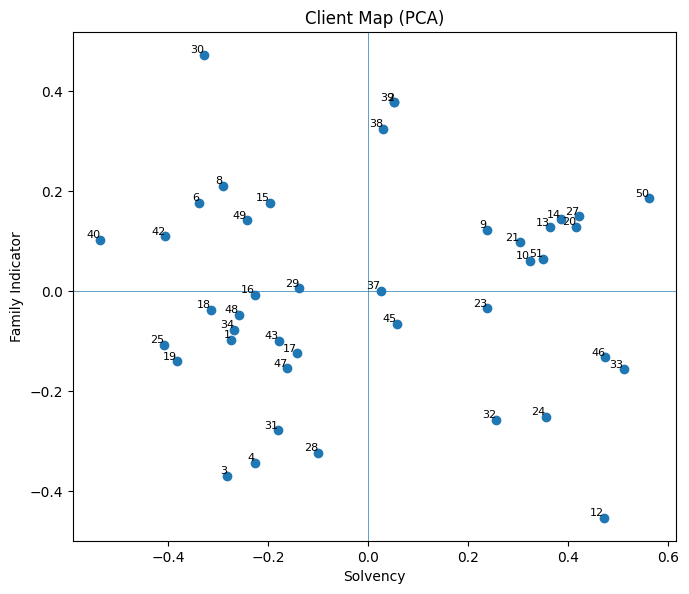

In [50]:
plt.figure(figsize=(7,7))
plt.scatter(clients_coords["Solvency"], clients_coords["Family indicator"])
for i, (x, y) in enumerate(clients_coords.values):
    plt.text(x, y, str(clients_coords.index[i]), fontsize=8, ha="right", va="bottom")

plt.title(f"Client Map (PCA)")
plt.xlabel("Solvency")
plt.ylabel("Family Indicator")
plt.tight_layout()

plt.axhline(0, linewidth=0.5)
plt.axvline(0, linewidth=0.5)
plt.gca().set_aspect('equal','box')

plt.show()

Выводы о клиентах банка:
- ...

## MDS

In [47]:
D_cheb = squareform(pdist(X_k @ Vt2.T, metric='chebyshev'))
D_cheb

array([[0.        , 0.47506111, 0.2723248 , ..., 0.2392658 , 0.83692041,
        0.62467772],
       [0.47506111, 0.        , 0.74738591, ..., 0.29444378, 0.51020995,
        0.31324467],
       [0.2723248 , 0.74738591, 0.        , ..., 0.5115906 , 0.84387024,
        0.63162755],
       ...,
       [0.2392658 , 0.29444378, 0.5115906 , ..., 0.        , 0.80465373,
        0.59241104],
       [0.83692041, 0.51020995, 0.84387024, ..., 0.80465373, 0.        ,
        0.21224269],
       [0.62467772, 0.31324467, 0.63162755, ..., 0.59241104, 0.21224269,
        0.        ]], shape=(42, 42))

In [49]:
# Используем метрический MDS с расстояниями Чебышёва
mds = MDS(
    n_components=2,
    dissimilarity='precomputed',
    random_state=42,
    max_iter=1000,
    eps=1e-9
)

X_mds = mds.fit_transform(D_cheb)

# Оценка погрешности (stress)
stress = mds.stress_
print(f"Stress (погрешность MDS): {stress:.4f}")

# Нормированный стресс (часто используется)
total_sq = (D_cheb ** 2).sum() / 2  # sum over i<j
normalized_stress = stress / total_sq
print(f"Normalized stress: {normalized_stress:.4f}")

Stress (погрешность MDS): 1.2308
Normalized stress: 0.0059


/usr/local/lib/python3.10/site-packages/sklearn/manifold/_mds.py:677: FutureWarning: The default value of `n_init` will change from 4 to 1 in 1.9.
  warnings.warn(



Расстояние Минковского между двумя точками \( x, y \in \mathbb{R}^p \):

\[
d_p(x, y) = \left( \sum_{j=1}^p |x_j - y_j|^p \right)^{1/p}
\]

Частные случаи:
- \( p = 1 \) → **Манхэттенское (городское) расстояние**  
- \( p = 2 \) → **Евклидово расстояние**  
- \( p \to \infty \) → **Чебышёва**: \( \max_j |x_j - y_j| \)

---

Ключевой вопрос: **является ли метрика \( d_p \) евклидовой?**

> **Теорема**:  
> Расстояние Минковского \( d_p \) **порождает евклидову метрику тогда и только тогда, когда \( p = 2 \)**.

Для всех других \( p \ne 2 \), включая:
- \( p = 1 \) (Манхэттен),
- \( p = \infty \) (Чебышёв),
- любые \( p \in (0, \infty) \setminus \{2\} \),

метрика **не является евклидовой**, то есть **не существует вложения в \( \mathbb{R}^k \) с сохранением всех расстояний**.

- Евклидовость требует, чтобы матрица \( B = -\frac{1}{2} H D^{(2)} H \) была **положительно полуопределённой**.
- Для \( p \ne 2 \) эта матрица **имеет отрицательные собственные значения** → нарушение условия.

> Ни Манхэттенское, ни Чебышёвское, ни другие \( L_p \)-расстояния (кроме \( p=2 \)) **нельзя точно вложить в евклидово пространство любой размерности** без искажений.


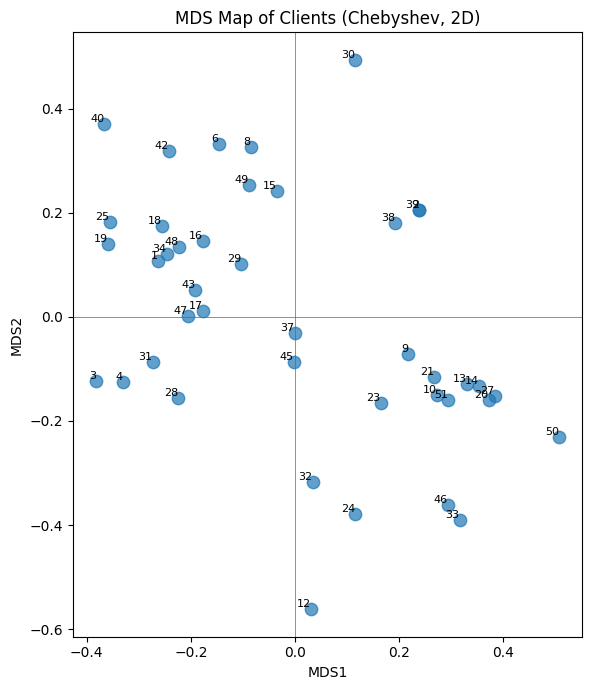

In [56]:
plt.figure(figsize=(7,7))
plt.scatter(X_mds[:, 0], X_mds[:, 1], alpha=0.7, s=80)
for i, (x, y) in enumerate(X_mds):
    plt.text(x, y, str(clients_coords.index[i]), fontsize=8, ha="right", va="bottom")

plt.title(f"MDS Map of Clients (Chebyshev, 2D)")
plt.xlabel("MDS1")
plt.ylabel("MDS2")
plt.tight_layout()

plt.axhline(0, linewidth=0.5)
plt.axvline(0, linewidth=0.5)
plt.gca().set_aspect('equal','box')

plt.show()

Сравнение с картой клиентов из PCA:
- ...

## Выводы

Тут будут выводы